In [1]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import random
import math

<h1>UNSUPERVISED LEARNING (CLUSTERING)</h1>

Task : Tugas untuk unsupervised learning adalah memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.

Langkah pertama yaitu meng-<i>input</i> dataset (kendaraaan_train.csv)

In [2]:
dataset = pd.read_csv('kendaraan_train.csv')
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


Periksa dataset apakah terdapat data NaN/Null/Kosong pada setiap rownya

In [3]:
dataset.isnull().values.any()

True

Karena terdapat data NaN pada dataset, maka data yang memiliki value NaN akan di-drop

In [4]:
dataset = dataset.dropna()

In [5]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


In [6]:
dataset.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Karena tipe data Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak bertipe kategorikal, maka kolom-kolom tersebut dirubah ke tipe numerikal
hal ini dilakukan agar setiap rownya bisa dihitung jaraknya terhadap centroid seperti yang ada pada algoritma k-nn

Merubah tipe data ini menggunakan fungsi LabelEncoder yang ada pada library sklearn

In [7]:
dataset['Jenis_Kelamin'] = LabelEncoder().fit_transform(dataset['Jenis_Kelamin'])
dataset['Umur_Kendaraan'] = LabelEncoder().fit_transform(dataset['Umur_Kendaraan'])
dataset['Kendaraan_Rusak'] = LabelEncoder().fit_transform(dataset['Kendaraan_Rusak'])

In [8]:
dataset.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0


In [9]:
dataset.dtypes

id                     int64
Jenis_Kelamin          int64
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan         int64
Kendaraan_Rusak        int64
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Kolom id tidak digunakan, maka akan di-drop

In [10]:
dataset = dataset.drop(['id'], axis=1)

In [11]:
dataset.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0


Dataset tersebut memiliki fitur lebih dari 2, maka dari itu, dataset dirubah ke bentuk PCA atau Principal component analysis.

PCA adalah sebuah metode untuk mengurangi dimensi pada data dengan menggunakan Singular Value Decomposition (SVD)

In [12]:
pca = PCA(n_components=2)
dataset_pca = pca.fit_transform(dataset.drop(['Tertarik'], axis=1))

Setelah dataset dirubah, maka akan terlihat seperti array di bawah (2 Dimensi)

In [13]:
dataset_pca

array([[-2.47776147e+03, -5.72376644e+01],
       [-4.70671699e+03,  3.63637212e+00],
       [-2.78767482e+04, -9.14421772e+01],
       ...,
       [ 1.92442358e+04,  7.18943512e+01],
       [-3.75029075e+00,  1.15761727e+02],
       [ 5.97328402e+03, -1.10289210e+02]])

<h3>Visual dataset PCA</h3>

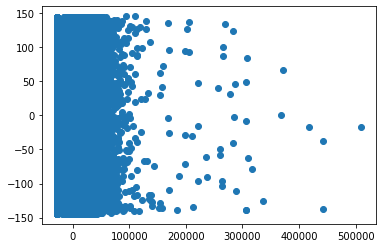

In [14]:
plt.scatter(dataset_pca[:,0],dataset_pca[:,1])
plt.show()

<h3>Fungsi-fungsi yang digunakan untuk K-nn</h3>

In [15]:
#Fungsi menghtiung jarak menggunakan metode Euclidean Distance
def euclidianDistance(a,b):
    hasil = 0
    for i in range(len(a)):
        hasil = hasil + math.pow(a[i]-b[i],2)
    return math.sqrt(hasil)

#fungsi mencari rata-rata jarak antara data ke centroid, kemudian mengembalikan centroid baru
def meanCentroid(c):
    new_centroid = []
    for i in range(len(c[0])):
        res = 0
        for j in range(len(c)):
            res = res + c[j][i]
        res = res/len(c)
        new_centroid.append(res)
    return new_centroid

#Fungsi menginisiasi data kosong pada setiap centroid
def initiateCentroidData():
    c_arr = []
    for i in range(len(centroid)):
        c_arr.append([])
    return c_arr

#Fungsi menghitung akurasi
def calculateAcc2d(y_pred, y_val):
    y_pred = np.array(y_pred)
    y_val = np.array(y_val)
    res = 0
    if len(y_pred) == len(y_val):
        for i in range(len(y_pred)):
            if y_pred[i] == y_val[i]:
                res = res+1
        res = res/len(y_pred)
    return res

Inisiasi jumlah cluster, di sini k=2 karena ingin memprediksi pelanggan tertarik atau tidak

In [16]:
k = 2

Menginisiasi centroid awal dengan memilih data secara random pada dataset

In [17]:
centroid = random.sample(list(dataset_pca), k)
centroid = np.array(centroid)

Melakukan perulangan untuk menjalankan algoritma K-nn

In [18]:
#perulangan sampai centroid sebelumnya dan centroid sekarang tidak berubah
while True:
    #inisiasi data terdekat (kosong) untuk setiap centroid
    c_arr = initiateCentroidData()
    
    #perulangan untuk setiap data pada dataset
    for i in range(len(dataset_pca)):
        
        #inisiasi index untuk jarak minimum
        idx_min = 0
        
        #menghitung jarak dari data i ke centroid 0
        min_dis = euclidianDistance(dataset_pca[i],centroid[idx_min])
        
        #perulangan untuk menghitung jarak data i ke centroid selain 0
        for j in range(1,len(centroid)):
            
            #mengitung jarak dari data i ke centroid j
            temp_min = euclidianDistance(dataset_pca[i],centroid[j])
            
            #memeriksa centroid manakah yang paling minimum jaraknya terhadap data i
            if min_dis > temp_min:
                idx_min = j
                min_dis = temp_min
        
        #memasukkan data i ke array centroid dengan jarak terdekat
        c_arr[idx_min].append(dataset_pca[i])
    
    #centroid lama disalin
    old_centroid = centroid.copy()
    
    #mencari centroid baru
    for i in range(len(centroid)):
        centroid[i] = meanCentroid(c_arr[i])
        
    #memeriksa apakah centroid lama sama dengan centroid baru, jika iya maka perulangan terhenti
    if (old_centroid==centroid).all():
        break

Hasil centroid dari algoritma K-nn setelah dilatih pada data latih (kendaraan_train.csv)

In [19]:
centroid

array([[ 6.12910270e+03,  9.08832943e-02],
       [-2.63913942e+04, -3.91335725e-01]])

<h3> Visualisasi hasil clustering terhadap dataset </h3>

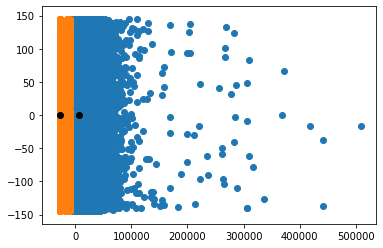

In [20]:
if len(c_arr[0][0]) == 2:
    for i in c_arr:
        plt.scatter([row[0] for row in i],[row[1] for row in i])
    for i in centroid:
        plt.scatter(i[0],i[1],c='black')
    plt.show()
if len(c_arr[0][0]) == 3:
    ax = plt.axes(projection="3d")
    for i in c_arr:
        ax.scatter3D([row[0] for row in i],[row[1] for row in i],[row[2] for row in i])
    for i in centroid:
        ax.scatter3D(i[0],i[1],i[2],c='black')
    plt.show()

<h3> Menyimpan hasil clustering data latih</h3>

In [21]:
try:
    with open('clustering_result.csv','wb') as file:
        #write column
#         str_write = 'x,y,'
#         file.write(str_write.encode())
        file.write('label'.encode())
        file.write('\n'.encode())
        #write data
        for i in range(len(c_arr)):
            for j in c_arr[i]:
#                 str_write = ''
#                 for k in j:
#                     str_write = str_write+str(k)+','
#                 file.write(str_write.encode())
                file.write(str(i).encode()) 
                file.write('\n'.encode())
    print('result saved in clustering_result.csv')
except:
    print('Result cant be saved!')

result saved in clustering_result.csv


<h3>Menghitung akurasi hasil prediksi data latih</h3>

Ambil label pada dataset

In [22]:
y_val = dataset['Tertarik']

Ambil label prediksi dari hasil clustering

In [23]:
y_pred = pd.read_csv('clustering_result.csv')
y_pred = y_pred['label']

Menghitung akurasinya

In [24]:
acc = calculateAcc2d(y_val,y_pred)
print('Akurasi data latih: ',acc)

Akurasi data latih:  0.7360640213248533


<h3> Menerapkan centroid yang sudah dilatih pada data test </h3>

Input data test

In [25]:
data_test = pd.read_csv('kendaraan_test.csv')

Periksa data test apakah terdapat data NaN/Null/Kosong pada setiap rownya

In [26]:
data_test.isnull().values.any()

False

In [27]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [28]:
data_test.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

Karena tipe data Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak bertipe kategorikal, maka kolom-kolom tersebut dirubah ke tipe numerikal hal ini dilakukan agar setiap rownya bisa dihitung jaraknya terhadap centroid seperti yang ada pada algoritma k-nn

Merubah tipe data ini menggunakan fungsi LabelEncoder yang ada pada library sklearn

In [29]:
data_test['Jenis_Kelamin'] = LabelEncoder().fit_transform(data_test['Jenis_Kelamin'])
data_test['Umur_Kendaraan'] = LabelEncoder().fit_transform(data_test['Umur_Kendaraan'])
data_test['Kendaraan_Rusak'] = LabelEncoder().fit_transform(data_test['Kendaraan_Rusak'])


Dataset tersebut memiliki fitur lebih dari 2, maka dari itu, dataset dirubah ke bentuk PCA atau Principal component analysis.

PCA adalah sebuah metode untuk mengurangi dimensi pada data dengan menggunakan Singular Value Decomposition (SVD)

In [30]:
data_test_pca = pca.fit_transform(data_test.drop(['Tertarik'], axis=1))

In [31]:
data_test_pca

array([[ 1.63365521e+04, -8.86774363e+00],
       [ 8.99749881e+03,  8.67398272e+01],
       [ 7.98524986e+04, -9.02465144e+01],
       ...,
       [ 2.47450042e+03,  5.65752208e+01],
       [ 7.16155076e+03,  8.48477398e+01],
       [-2.79964831e+04,  1.47422180e+01]])

<h3>Visual data test PCA</h3>

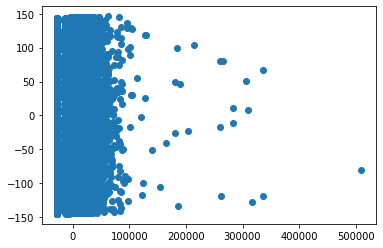

In [32]:
plt.scatter(data_test_pca[:,0],data_test_pca[:,1])
plt.show()

Mengcluster data test dengan menghitung jarak setiap data terhadarp centroid yang sebelumnya sudah didapatkan

In [33]:
c_arr_test = initiateCentroidData()
for i in range(len(data_test_pca)):
    

    #inisiasi index untuk jarak minimum
    idx_min = 0

    #menghitung jarak dari data i ke centroid 0
    min_dis = euclidianDistance(data_test_pca[i],centroid[idx_min])

    #perulangan untuk menghitung jarak data i ke centroid selain 0
    for j in range(1,len(centroid)):

        #mengitung jarak dari data i ke centroid j
        temp_min = euclidianDistance(data_test_pca[i],centroid[j])

        #memeriksa centroid manakah yang paling minimum jaraknya terhadap data i
        if min_dis > temp_min:
            idx_min = j
            min_dis = temp_min
    #memasukkan data i ke array centroid dengan jarak terdekat
    c_arr_test[idx_min].append(data_test_pca[i])

<h3>Visualisasi cluster data test</h3>

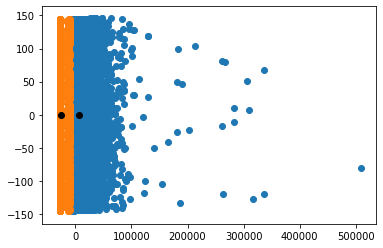

In [34]:
for i in c_arr_test:
    plt.scatter([row[0] for row in i],[row[1] for row in i])
for i in centroid:
    plt.scatter(i[0],i[1],c='black')
plt.show()

Menyimpan hasil cluster data test

In [35]:
try:
    with open('clustering_result_test.csv','wb') as file:
        #write column
#         str_write = 'x,y,'
#         file.write(str_write.encode())
        file.write('label'.encode())
        file.write('\n'.encode())
        #write data
        for i in range(len(c_arr)):
            for j in c_arr_test[i]:
#                 str_write = ''
#                 for k in j:
#                     str_write = str_write+str(k)+','
#                 file.write(str_write.encode())
                file.write(str(i).encode()) 
                file.write('\n'.encode())
    print('result saved in clustering_result_test.csv')
except:
    print('Result cant be saved!')

result saved in clustering_result_test.csv


<h3>Menghitung akurasi hasil prediksi data test</h3>

Ambil label pada dataset dan label pada hasil prediksi

In [36]:
y_val_test = data_test['Tertarik']
y_pred_test = pd.read_csv('clustering_result_test.csv')
y_pred_test = y_pred_test['label']

Menghitung akurasinya

In [37]:
acc = calculateAcc2d(y_val_test,y_pred_test)
print('Akurasi: ',acc)

Akurasi:  0.7364554251768509
